In [1]:
print('This is a edit mode~!')

This is a edit mode~!


## This is a Markdown style

In [13]:
import os
import pandas as pd

# Define the directory path containing the CSV files
directory_path = '/scratch/hpc133a01/kuwait-Flu/'

# Function to convert filenames to valid variable names
def make_valid_varname(filename):
    return filename.replace('-', '_').replace(' ', '_')

# Dictionary to store DataFrames for easy access
dataframes = {}

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        # Create the file path
        file_path = os.path.join(directory_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Create a variable name based on the file name without the '.csv' extension
        variable_name = make_valid_varname(filename[:-4])
        # Assign the DataFrame to a variable with the created name
        globals()[variable_name] = df
        # Also store in a dictionary for easy access and iteration
        dataframes[variable_name] = df

# Now, to check the contents of each DataFrame, you can iterate over the dictionary
for name, dataframe in dataframes.items():
    print(f"Contents of DataFrame '{name}':")
    print(dataframe.head())  # Print first few rows
    print()  # Blank line for better readability

    # Uncomment the following lines to print more information about each DataFrame:
    # print(dataframe.info())
    # print(dataframe.describe())
    # print()  # Blank line for better readability

Contents of DataFrame 'Kuwait_infA':
   Unnamed: 0 country  year  week  INF_A origin_source
0       51606  Kuwait  2017    35      4    NOTDEFINED
1       51607  Kuwait  2017    36      9    NOTDEFINED
2       51608  Kuwait  2017    37      7    NOTDEFINED
3       51609  Kuwait  2017    38     15    NOTDEFINED
4       51610  Kuwait  2017    39    154    NOTDEFINED

Contents of DataFrame 'Korea_infA':
   Unnamed: 0            country  year  week  INF_A origin_source
0       76377  Republic of Korea  2010     1    158    NOTDEFINED
1       76378  Republic of Korea  2010     2    121    NOTDEFINED
2       76379  Republic of Korea  2010     3     80    NOTDEFINED
3       76380  Republic of Korea  2010     4     89    NOTDEFINED
4       76381  Republic of Korea  2010     5     67    NOTDEFINED



In [14]:
import os
import pandas as pd

# Define the directory path containing the CSV files
directory_path = '/scratch/hpc133a01/kuwait-Flu/'

# Function to convert filenames to valid variable names
def make_valid_varname(filename):
    return filename.replace('-', '_').replace(' ', '_')

# Dictionary to store original and filtered DataFrames for easy access
dataframes = {}

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        # Create the file path
        file_path = os.path.join(directory_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Create a variable name based on the file name without the '.csv' extension
        variable_name = make_valid_varname(filename[:-4])
        # Assign the DataFrame to a variable with the created name
        globals()[variable_name] = df
        # Also store in a dictionary for easy access and iteration
        dataframes[variable_name] = df

        # Filter the DataFrame for years 2018 and 2019
        if 'year' in df.columns:
            df_filtered = df[(df['year'] >= 2018) & (df['year'] <= 2019)]
            filtered_variable_name = f"{variable_name}_filtered"
            globals()[filtered_variable_name] = df_filtered
            dataframes[filtered_variable_name] = df_filtered
        else:
            print(f"No 'year' column found in {filename}")

# Now, to check the contents of each DataFrame, you can iterate over the dictionary
for name, dataframe in dataframes.items():
    print(f"Contents of DataFrame '{name}':")
    print(dataframe.head())  # Print first few rows
    print()  # Blank line for better readability

    # Uncomment the following lines to print more information about each DataFrame:
    # print(dataframe.info())
    # print(dataframe.describe())
    # print()  # Blank line for better readability

Contents of DataFrame 'Kuwait_infA':
   Unnamed: 0 country  year  week  INF_A origin_source
0       51606  Kuwait  2017    35      4    NOTDEFINED
1       51607  Kuwait  2017    36      9    NOTDEFINED
2       51608  Kuwait  2017    37      7    NOTDEFINED
3       51609  Kuwait  2017    38     15    NOTDEFINED
4       51610  Kuwait  2017    39    154    NOTDEFINED

Contents of DataFrame 'Kuwait_infA_filtered':
    Unnamed: 0 country  year  week  INF_A origin_source
18       51624  Kuwait  2018     1     69    NOTDEFINED
19       51625  Kuwait  2018     2     64    NOTDEFINED
20       51626  Kuwait  2018     3     54    NOTDEFINED
21       51627  Kuwait  2018     4     42    NOTDEFINED
22       51628  Kuwait  2018     5     35    NOTDEFINED

Contents of DataFrame 'Korea_infA':
   Unnamed: 0            country  year  week  INF_A origin_source
0       76377  Republic of Korea  2010     1    158    NOTDEFINED
1       76378  Republic of Korea  2010     2    121    NOTDEFINED
2       76379  

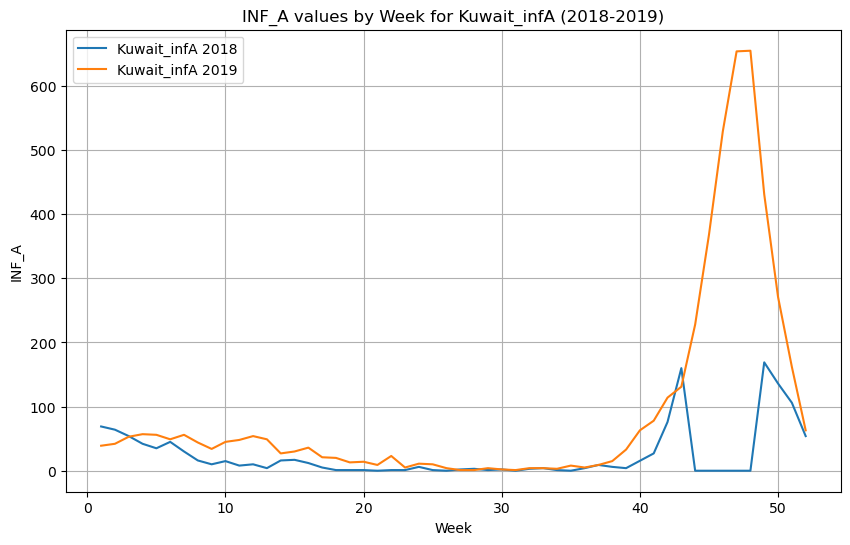

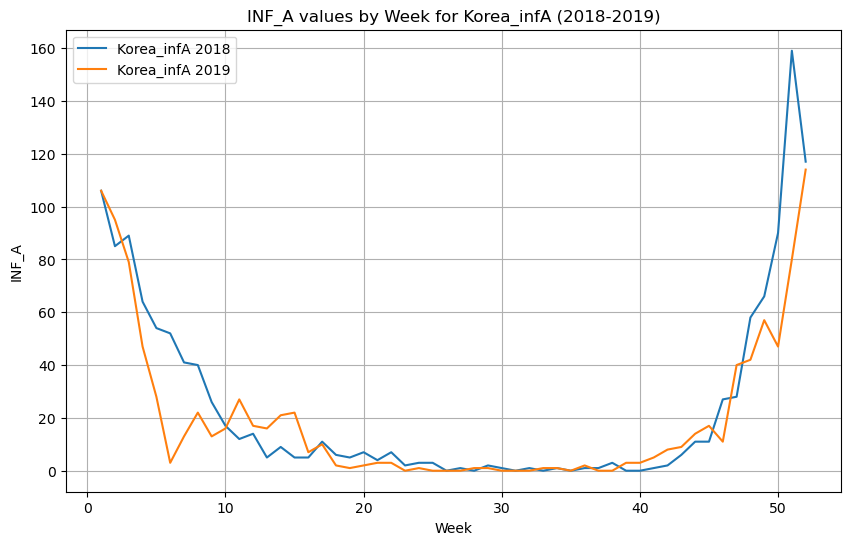

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the directory path containing the CSV files
directory_path = '/scratch/hpc133a01/kuwait-Flu/'

# Function to convert filenames to valid variable names
def make_valid_varname(filename):
    return filename.replace('-', '_').replace(' ', '_')

# Dictionary to store original and filtered DataFrames for easy access
dataframes = {}

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        # Create the file path
        file_path = os.path.join(directory_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Create a variable name based on the file name without the '.csv' extension
        variable_name = make_valid_varname(filename[:-4])
        # Assign the DataFrame to a variable with the created name
        globals()[variable_name] = df
        # Also store in a dictionary for easy access and iteration
        dataframes[variable_name] = df

        # Filter the DataFrame for years 2018 and 2019
        if 'year' in df.columns and 'INF_A' in df.columns and 'week' in df.columns:
            df_filtered = df[(df['year'] >= 2018) & (df['year'] <= 2019)]
            filtered_variable_name = f"{variable_name}_filtered"
            globals()[filtered_variable_name] = df_filtered
            dataframes[filtered_variable_name] = df_filtered

            # Plotting the line graph for the filtered DataFrame
            plt.figure(figsize=(10, 6))
            for year in [2018, 2019]:
                df_year = df_filtered[df_filtered['year'] == year]
                plt.plot(df_year['week'], df_year['INF_A'], label=f'{variable_name} {year}')
            
            plt.xlabel('Week')
            plt.ylabel('INF_A')
            plt.title(f'INF_A values by Week for {variable_name} (2018-2019)')
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
            print(f"Required columns ('year', 'INF_A', 'week') not found in {filename}")

# If you want to check the contents of each DataFrame, you can uncomment the following lines
# for name, dataframe in dataframes.items():
#     print(f"Contents of DataFrame '{name}':")
#     print(dataframe.head())  # Print first few rows
#     print()  # Blank line for better readability

#     # Uncomment the following lines to print more information about each DataFrame:
#     # print(dataframe.info())
#     # print(dataframe.describe())
#     # print()  # Blank line for better readability

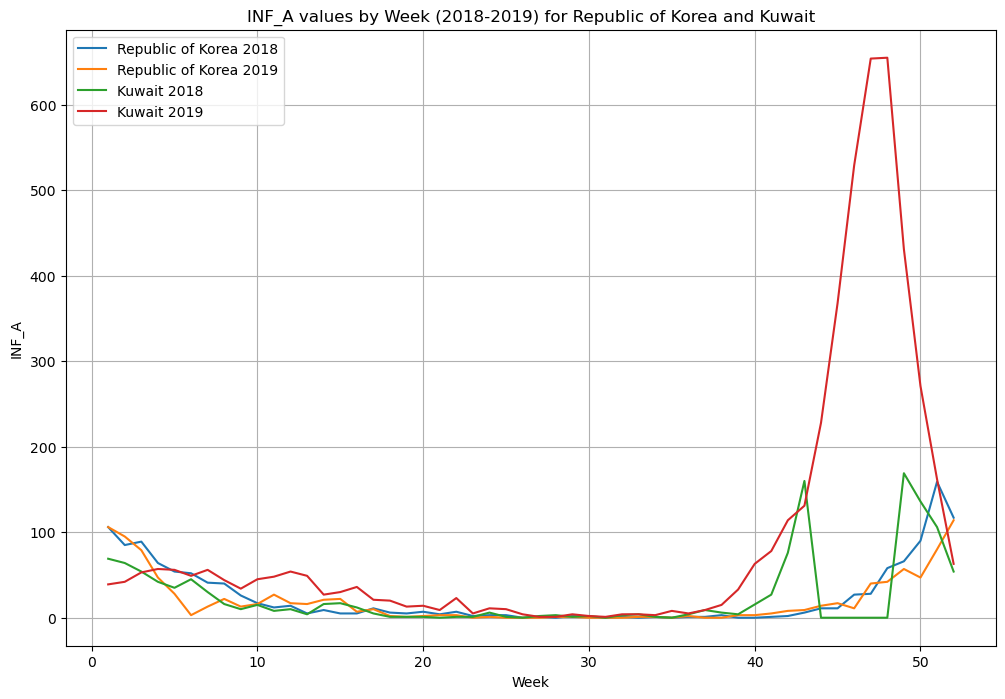

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the directory path containing the CSV files
directory_path = '/scratch/hpc133a01/kuwait-Flu/'

# Function to convert filenames to valid variable names
def make_valid_varname(filename):
    return filename.replace('-', '_').replace(' ', '_')

# List of target countries
target_countries = ['Republic of Korea', 'Kuwait']

# Dictionary to store original and filtered DataFrames for easy access
dataframes = {}
filtered_dataframes = {}

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        # Create the file path
        file_path = os.path.join(directory_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Create a variable name based on the file name without the '.csv' extension
        variable_name = make_valid_varname(filename[:-4])
        # Assign the DataFrame to a variable with the created name
        globals()[variable_name] = df
        # Also store in a dictionary for easy access and iteration
        dataframes[variable_name] = df

        # Filter the DataFrame for years 2018 and 2019 and target countries
        if 'year' in df.columns and 'INF_A' in df.columns and 'week' in df.columns and 'country' in df.columns:
            df_filtered = df[(df['year'] >= 2018) & (df['year'] <= 2019) & (df['country'].isin(target_countries))]
            filtered_variable_name = f"{variable_name}_filtered"
            globals()[filtered_variable_name] = df_filtered
            filtered_dataframes[filtered_variable_name] = df_filtered
        else:
            print(f"Required columns ('year', 'INF_A', 'week', 'country') not found in {filename}")

# Combine filtered data for plotting
combined_df = pd.concat(filtered_dataframes.values())

# Plotting the line graph for the filtered DataFrame
plt.figure(figsize=(12, 8))
for country in target_countries:
    df_country = combined_df[combined_df['country'] == country]
    for year in [2018, 2019]:
        df_year = df_country[df_country['year'] == year]
        plt.plot(df_year['week'], df_year['INF_A'], label=f'{country} {year}')

plt.xlabel('Week')
plt.ylabel('INF_A')
plt.title('INF_A values by Week (2018-2019) for Republic of Korea and Kuwait')
plt.legend()
plt.grid(True)
plt.show()

# If you want to check the contents of each DataFrame, you can uncomment the following lines
# for name, dataframe in filtered_dataframes.items():
#     print(f"Contents of DataFrame '{name}':")
#     print(dataframe.head())  # Print first few rows
#     print()  # Blank line for better readability

#     # Uncomment the following lines to print more information about each DataFrame:
#     # print(dataframe.info())
#     # print(dataframe.describe())
#     # print()  # Blank line for better readability

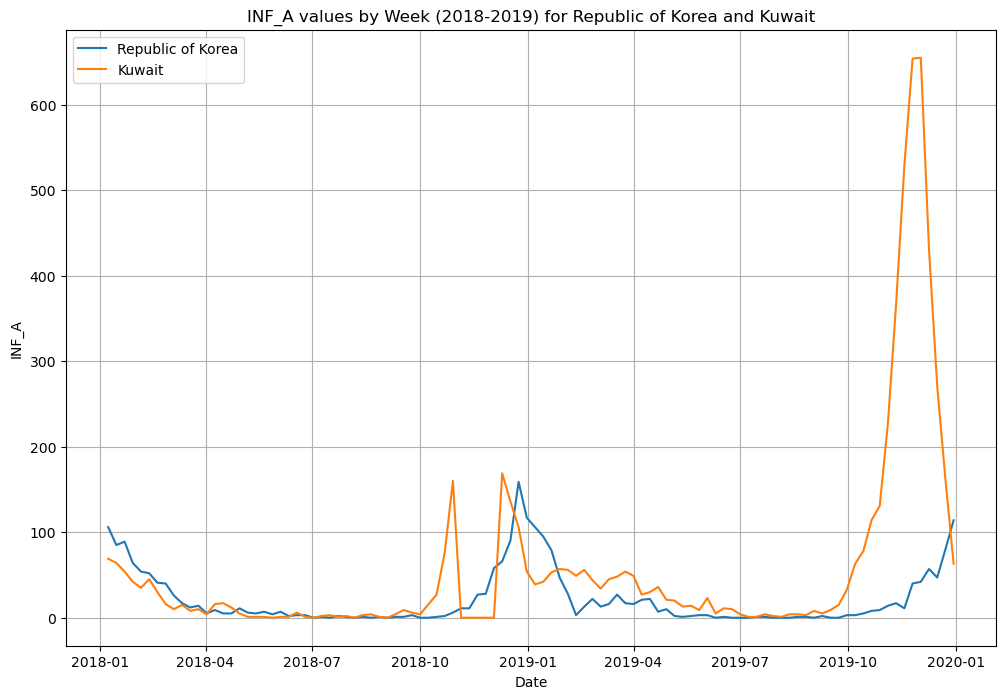

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the directory path containing the CSV files
directory_path = '/scratch/hpc133a01/kuwait-Flu/'

# Function to convert filenames to valid variable names
def make_valid_varname(filename):
    return filename.replace('-', '_').replace(' ', '_')

# List of target countries
target_countries = ['Republic of Korea', 'Kuwait']

# Dictionary to store original and filtered DataFrames for easy access
dataframes = {}
filtered_dataframes = {}

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        # Create the file path
        file_path = os.path.join(directory_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Create a variable name based on the file name without the '.csv' extension
        variable_name = make_valid_varname(filename[:-4])
        # Assign the DataFrame to a variable with the created name
        globals()[variable_name] = df
        # Also store in a dictionary for easy access and iteration
        dataframes[variable_name] = df

        # Filter the DataFrame for years 2018 and 2019 and target countries
        if 'year' in df.columns and 'INF_A' in df.columns and 'week' in df.columns and 'country' in df.columns:
            df_filtered = df[(df['year'] >= 2018) & (df['year'] <= 2019) & (df['country'].isin(target_countries))]
            filtered_variable_name = f"{variable_name}_filtered"
            globals()[filtered_variable_name] = df_filtered
            filtered_dataframes[filtered_variable_name] = df_filtered
        else:
            print(f"Required columns ('year', 'INF_A', 'week', 'country') not found in {filename}")

# Combine filtered data for plotting
combined_df = pd.concat(filtered_dataframes.values())

# Convert 'week' and 'year' to a datetime format for a continuous x-axis
combined_df['date'] = combined_df.apply(lambda row: f"{row['year']}-{int(row['week']):02}-1", axis=1)
combined_df['date'] = pd.to_datetime(combined_df['date'], format='%Y-%U-%w')

# Plotting the line graph for the filtered DataFrame
plt.figure(figsize=(12, 8))
for country in target_countries:
    df_country = combined_df[combined_df['country'] == country]
    plt.plot(df_country['date'], df_country['INF_A'], label=country)

plt.xlabel('Date')
plt.ylabel('INF_A')
plt.title('INF_A values by Week (2018-2019) for Republic of Korea and Kuwait')
plt.legend()
plt.grid(True)
plt.show()

# If you want to check the contents of each DataFrame, you can uncomment the following lines
# for name, dataframe in filtered_dataframes.items():
#     print(f"Contents of DataFrame '{name}':")
#     print(dataframe.head())  # Print first few rows
#     print()  # Blank line for better readability

#     # Uncomment the following lines to print more information about each DataFrame:
#     # print(dataframe.info())
#     # print(dataframe.describe())
#     # print()  # Blank line for better readability

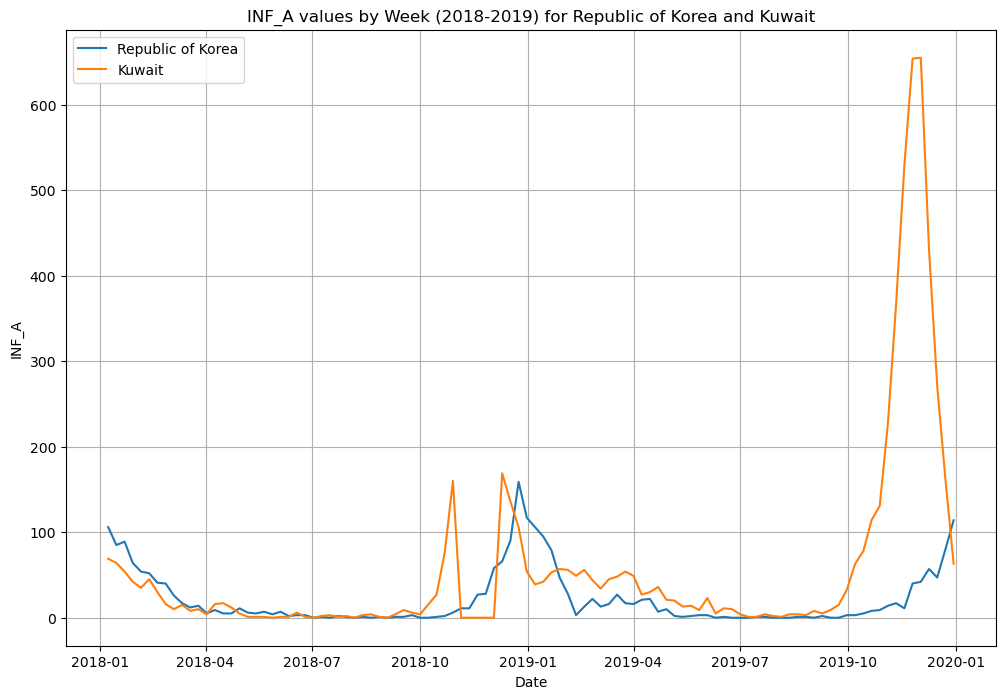

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the directory path containing the CSV files
directory_path = '/scratch/hpc133a01/kuwait-Flu/'

# Function to convert filenames to valid variable names
def make_valid_varname(filename):
    return filename.replace('-', '_').replace(' ', '_')

# List of target countries
target_countries = ['Republic of Korea', 'Kuwait']

# Dictionary to store original and filtered DataFrames for easy access
dataframes = {}
filtered_dataframes = {}

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        # Create the file path
        file_path = os.path.join(directory_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Create a variable name based on the file name without the '.csv' extension
        variable_name = make_valid_varname(filename[:-4])
        # Assign the DataFrame to a variable with the created name
        globals()[variable_name] = df
        # Also store in a dictionary for easy access and iteration
        dataframes[variable_name] = df

        # Filter the DataFrame for years 2018 and 2019 and target countries
        if 'year' in df.columns and 'INF_A' in df.columns and 'week' in df.columns and 'country' in df.columns:
            df_filtered = df[(df['year'] >= 2018) & (df['year'] <= 2019) & (df['country'].isin(target_countries))]
            filtered_variable_name = f"{variable_name}_filtered"
            globals()[filtered_variable_name] = df_filtered
            filtered_dataframes[filtered_variable_name] = df_filtered
        else:
            print(f"Required columns ('year', 'INF_A', 'week', 'country') not found in {filename}")

# Combine filtered data for plotting
combined_df = pd.concat(filtered_dataframes.values())

# Convert 'week' and 'year' to a datetime format for a continuous x-axis
combined_df['date'] = combined_df.apply(lambda row: f"{row['year']}-{int(row['week']):02}-1", axis=1)
combined_df['date'] = pd.to_datetime(combined_df['date'], format='%Y-%U-%w')

# Plotting the line graph for the filtered DataFrame
plt.figure(figsize=(12, 8))
for country in target_countries:
    df_country = combined_df[combined_df['country'] == country]
    plt.plot(df_country['date'], df_country['INF_A'], label=country)

plt.xlabel('Date')
plt.ylabel('INF_A')
plt.title('INF_A values by Week (2018-2019) for Republic of Korea and Kuwait')
plt.legend()
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('result.png')

plt.show()

# If you want to check the contents of each DataFrame, you can uncomment the following lines
# for name, dataframe in filtered_dataframes.items():
#     print(f"Contents of DataFrame '{name}':")
#     print(dataframe.head())  # Print first few rows
#     print()  # Blank line for better readability

#     # Uncomment the following lines to print more information about each DataFrame:
#     # print(dataframe.info())
#     # print(dataframe.describe())
#     # print()  # Blank line for better readability